In [1]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

In [2]:
import configparser
c = configparser.ConfigParser()
c.read('../pyalgo.cfg')

[]

In [23]:
import quandl as q
q.ApiConfig.api_key = "####"  #Enter API KEY OF QUANDL

In [14]:
data = q.get('BCHAIN/MKPRU')

In [16]:
data

,Value
Date,
2009-01-02,0.00
2009-01-03,0.00
2009-01-04,0.00
2009-01-05,0.00
2009-01-06,0.00
...,...
2021-03-25,52508.23
2021-03-26,51415.92
2021-03-27,55074.47


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4470 entries, 2009-01-02 to 2021-03-29
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   4470 non-null   float64
dtypes: float64(1)
memory usage: 69.8 KB


In [18]:
data['Value'].resample('A').last()

Date
2009-12-31        0.000000
2010-12-31        0.299998
2011-12-31        5.200000
2012-12-31       13.561000
2013-12-31      746.900000
2014-12-31      315.700000
2015-12-31      429.340000
2016-12-31      959.870000
2017-12-31    14165.575000
2018-12-31     3791.545833
2019-12-31     7219.600000
2020-12-31    28856.590000
2021-12-31    55783.710000
Freq: A-DEC, Name: Value, dtype: float64

In [20]:
vol = q.get('VOL/MSFT')
vol.iloc[:, :10].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2015-01-02 to 2018-12-31
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hv10    1006 non-null   float64
 1   Hv20    1006 non-null   float64
 2   Hv30    1006 non-null   float64
 3   Hv60    1006 non-null   float64
 4   Hv90    1006 non-null   float64
 5   Hv120   1006 non-null   float64
 6   Hv150   1006 non-null   float64
 7   Hv180   1006 non-null   float64
 8   Phv10   1006 non-null   float64
 9   Phv20   1006 non-null   float64
dtypes: float64(10)
memory usage: 86.5 KB


In [22]:
vol[['IvMean30', 'IvMean60', 'IvMean90']].tail()

,IvMean30,IvMean60,IvMean90
Date,,,
2018-12-24,0.4310,0.4112,0.3829
2018-12-26,0.4059,0.3844,0.3587
2018-12-27,0.3918,0.3879,0.3618
2018-12-28,0.3940,0.3736,0.3482
2018-12-31,0.3760,0.3519,0.3310


In [ ]:
!pip uninstall sample-data

## Vectorized Backtesting


In [1]:
import numpy as np  
v = [1, 2, 3, 4, 5]
a = np.array(v)
a

array([1, 2, 3, 4, 5])

In [2]:
a*2

array([ 2,  4,  6,  8, 10])

In [4]:
0.5*a+2

array([2.5, 3. , 3.5, 4. , 4.5])

In [6]:
import pandas as pd
columns = list('abc')
columns

['a', 'b', 'c']

In [7]:
index = pd.date_range('2021-7-1', 
                     periods = 5, freq = 'B')
index

DatetimeIndex(['2021-07-01', '2021-07-02', '2021-07-05', '2021-07-06',
               '2021-07-07'],
              dtype='datetime64[ns]', freq='B')

In [10]:
a = np.arange(15).reshape(5, 3)
a

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [11]:
df = pd.DataFrame(a, columns= columns, index=index)

In [12]:
df

,a,b,c
2021-07-01,0,1,2
2021-07-02,3,4,5
2021-07-05,6,7,8
2021-07-06,9,10,11
2021-07-07,12,13,14


### Strategies Based on Simple Moving Averages


In [13]:
raw = pd.read_csv('http://hilpisch.com/pyalgo_eikon_eod_data.csv',
                            index_col=0, parse_dates=True).dropna() 

raw.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AAPL.O  2516 non-null   float64
 1   MSFT.O  2516 non-null   float64
 2   INTC.O  2516 non-null   float64
 3   AMZN.O  2516 non-null   float64
 4   GS.N    2516 non-null   float64
 5   SPY     2516 non-null   float64
 6   .SPX    2516 non-null   float64
 7   .VIX    2516 non-null   float64
 8   EUR=    2516 non-null   float64
 9   XAU=    2516 non-null   float64
 10  GDX     2516 non-null   float64
 11  GLD     2516 non-null   float64
dtypes: float64(12)
memory usage: 255.5 KB


In [15]:
data = pd.DataFrame(raw['EUR='])
data.rename(columns = {'EUR=':'price'}, inplace= True)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2010-01-04 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   2516 non-null   float64
dtypes: float64(1)
memory usage: 39.3 KB


In [18]:
data.head()

,price
Date,
2010-01-04,1.4411
2010-01-05,1.4368
2010-01-06,1.4412
2010-01-07,1.4318
2010-01-08,1.4412


In [19]:
data['sma42'] = data.price.rolling(42).mean()
data['sma252'] = data.price.rolling(252).mean()

data.tail()

,price,sma42,sma252
Date,,,
2019-12-24,1.1087,1.107698,1.119630
2019-12-26,1.1096,1.107740,1.119529
2019-12-27,1.1175,1.107924,1.119428
2019-12-30,1.1197,1.108131,1.119333
2019-12-31,1.1210,1.108279,1.119231


In [20]:
data.head()

,price,sma42,sma252
Date,,,
2010-01-04,1.4411,NaN,NaN
2010-01-05,1.4368,NaN,NaN
2010-01-06,1.4412,NaN,NaN
2010-01-07,1.4318,NaN,NaN
2010-01-08,1.4412,NaN,NaN


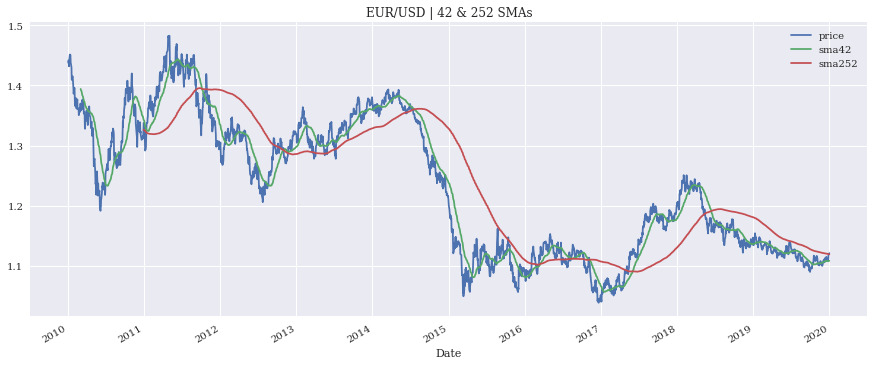

In [23]:
%matplotlib inline
from pylab import mpl, plt
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'

data.plot(title = 'EUR/USD | 42 & 252 SMAs', 
          figsize = (15,6))

In [25]:
data['position'] = np.where(data.sma42 > data.sma252,1, -1)
data.dropna(inplace = True)


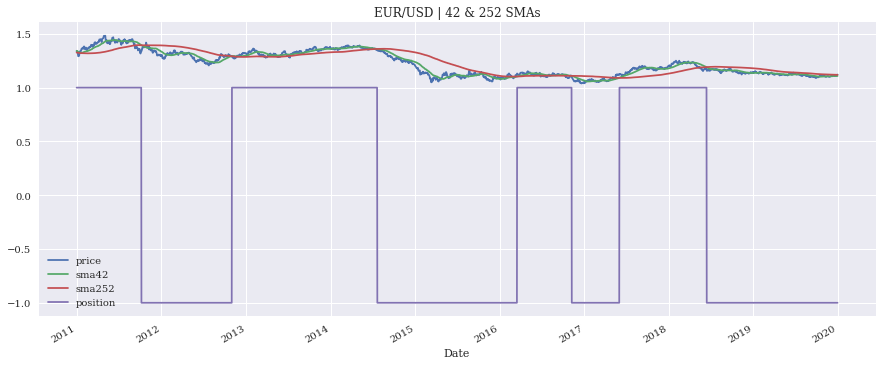

In [27]:
data.plot(title = 'EUR/USD | 42 & 252 SMAs', 
          figsize = (15,6))

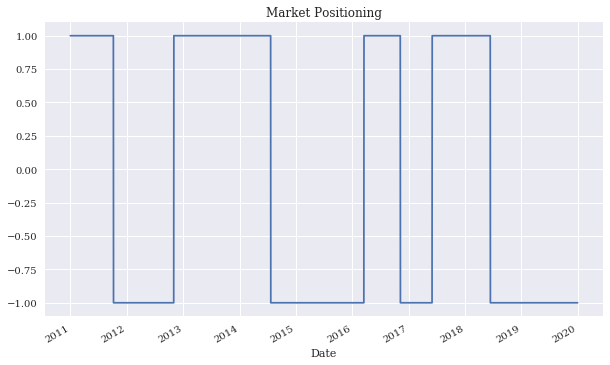

In [28]:
data['position'].plot(ylim=[-1.1, 1.1],
                       title='Market Positioning',
                       figsize=(10, 6))

In [2]:
prices_a = [8.7, 8.91, 8.71]

In [3]:
8.91/8.7 - 1

0.024137931034482918

In [4]:
8.71/8.91 - 1

-0.022446689113355678

In [5]:
prices_a[1:]

[8.91, 8.71]

In [6]:
prices_a[:-1]

[8.7, 8.91]

In [7]:
prices_a[1:]/prices_a[:-1] - 1

TypeError: unsupported operand type(s) for /: 'list' and 'list'

In [8]:
import numpy as np
prices_arr = np.array(prices_a)
prices_arr

array([8.7 , 8.91, 8.71])

In [9]:
prices_arr[1:]/prices_arr[:-1] - 1

array([ 0.02413793, -0.02244669])

In [3]:
import pandas as pd
prices = pd.DataFrame({"Blue": [8.7, 8.91, 8.71, 8.43, 8.73],
                    "Orange": [10.66, 11.08, 10.71, 11.59, 12.11]
                        })

In [4]:
prices

,Blue,Orange
0,8.70,10.66
1,8.91,11.08
2,8.71,10.71
3,8.43,11.59
4,8.73,12.11


In [5]:
prices/prices.shift(1)

,Blue,Orange
0,NaN,NaN
1,1.024138,1.039400
2,0.977553,0.966606
3,0.967853,1.082166
4,1.035587,1.044866


In [6]:
prices.pct_change()

,Blue,Orange
0,NaN,NaN
1,0.024138,0.039400
2,-0.022447,-0.033394
3,-0.032147,0.082166
4,0.035587,0.044866


In [7]:
pricedf = pd.read_csv('data/sample_prices.csv')
pricedf

,BLUE,ORANGE
0,8.7000,10.6600
1,8.9055,11.0828
2,8.7113,10.7100
3,8.4346,11.5907
4,8.7254,12.1070
5,9.0551,11.7876
6,8.9514,11.2078
7,9.2439,12.5192
8,9.1276,13.3624
9,9.3976,14.4080


In [8]:
returns = pricedf.pct_change()

In [9]:
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


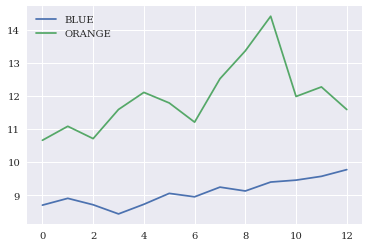

In [10]:
pricedf.plot()

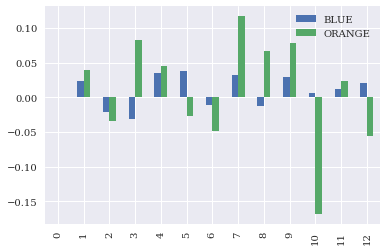

In [11]:
returns.plot.bar()

In [12]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [13]:
returns.mean()

BLUE      0.01
ORANGE    0.01
dtype: float64

In [14]:
returns+1

,BLUE,ORANGE
0,NaN,NaN
1,1.023621,1.039662
2,0.978193,0.966362
3,0.968237,1.082232
4,1.034477,1.044544
5,1.037786,0.973619
6,0.988548,0.950813
7,1.032676,1.117008
8,0.987419,1.067353
9,1.029581,1.078249


In [17]:
import numpy as np
np.prod(returns+1)-1

BLUE      0.123310
ORANGE    0.087167
dtype: float64

In [18]:
(((returns+1).prod() -1 )*100).round(2)

BLUE      12.33
ORANGE     8.72
dtype: float64

### Annualization 

In [1]:
rm = 0.01

(1+rm)**12 -1

0.12682503013196977

In [2]:
rq = 0.04

(1+rq)**4-1

0.1698585600000002

In [3]:
rd = 0.0001
(1+rd)**252 -1

0.025518911987694626

In [4]:
rd = 0.01
(1+rd)**252 -1

11.274002099240244

## Risk Adjusted Returns

In [5]:
import pandas as pd
prices = pd.read_csv("data/sample_prices.csv")
returns = prices.pct_change()
returns

,BLUE,ORANGE
0,NaN,NaN
1,0.023621,0.039662
2,-0.021807,-0.033638
3,-0.031763,0.082232
4,0.034477,0.044544
5,0.037786,-0.026381
6,-0.011452,-0.049187
7,0.032676,0.117008
8,-0.012581,0.067353
9,0.029581,0.078249


In [6]:
returns.dropna(inplace = True)

In [7]:
returns.std()

BLUE      0.023977
ORANGE    0.079601
dtype: float64

In [8]:
deviations = returns - returns.mean()
deviations

,BLUE,ORANGE
1,0.013621,0.029662
2,-0.031807,-0.043638
3,-0.041763,0.072232
4,0.024477,0.034544
5,0.027786,-0.036381
6,-0.021452,-0.059187
7,0.022677,0.107008
8,-0.022581,0.057353
9,0.019581,0.068250
10,-0.003849,-0.178261


In [9]:
squared_dev = deviations**2
squared_dev

,BLUE,ORANGE
1,0.000186,0.000880
2,0.001012,0.001904
3,0.001744,0.005217
4,0.000599,0.001193
5,0.000772,0.001324
6,0.000460,0.003503
7,0.000514,0.011451
8,0.000510,0.003289
9,0.000383,0.004658
10,0.000015,0.031777


In [10]:
variance = squared_dev.sum()/(len(squared_dev)-1)
variance

BLUE      0.000575
ORANGE    0.006336
dtype: float64

In [11]:
volatility = np.sqrt(variance)

NameError: name 'np' is not defined

In [12]:
volatility

NameError: name 'volatility' is not defined

    The above is volatility based on monthly data. To get annualized volatility, we will have to multiply with sq root of 12

In [13]:
volatility*np.sqrt(12)

NameError: name 'volatility' is not defined

### Work on portfolio data

In [19]:
returns = pd.read_csv("data/Portfolios_Formed_on_ME_monthly_EW.csv",
                     header = 0, index_col= 0, parse_dates=True, 
                     na_values = -99.99)

In [20]:
returns.head()

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70


In [22]:
columns = ['Lo 10', 'Hi 10']
returns = returns[columns]/100
returns

,Lo 10,Hi 10
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270
...,...,...
201808,0.0241,0.0234
201809,-0.0168,0.0087
201810,-0.1002,-0.0657
201811,-0.0365,0.0253


In [23]:
returns.columns = ['SmallCap', 'LargeCap']
returns.head()

,SmallCap,LargeCap
192607,-0.0145,0.0329
192608,0.0512,0.0370
192609,0.0093,0.0067
192610,-0.0484,-0.0243
192611,-0.0078,0.0270


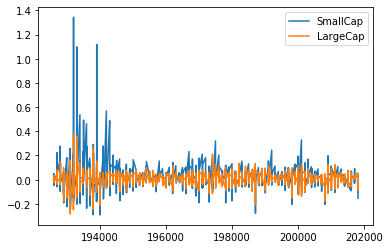

In [25]:
returns.plot.line()

In [26]:
returns.std()

SmallCap    0.106288
LargeCap    0.053900
dtype: float64

In [28]:
import numpy as np
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.368193
LargeCap    0.186716
dtype: float64

In [31]:
returns_per_month = (returns+1).prod()**(1/len(returns)) -1
returns_per_month

SmallCap    0.012986
LargeCap    0.007423
dtype: float64

In [33]:
annualized_return = (returns_per_month+1)**12 -1
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [34]:
annualized_return = (returns+1).prod() **(12/len(returns)) -1

In [35]:
annualized_return

SmallCap    0.167463
LargeCap    0.092810
dtype: float64

In [36]:
annualized_return/annualized_vol

SmallCap    0.454825
LargeCap    0.497063
dtype: float64

In [37]:
riskfree_rate = 0.08
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.237547
LargeCap    0.068605
dtype: float64